In [1]:
import pandas as pd
import statsmodels.api as sm
import re
import numpy as np
import pandas as pd
from itertools import product

In [2]:
def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)

Zones = pd.read_excel('Zones.xlsx')
Dataset = pd.read_csv('KAG 2016-17/Agriculture/Agriculture_KAG_2016_17.csv')
Dataset.columns = map(remove_pattern, Dataset.columns)

Maize_param = pd.read_csv('Params/3_Param_Maize_Multicollinearity.csv')
Rice_param = pd.read_csv('Params/3_parameters_multicollinearity_rice.csv')
Working_Directory = pd.read_csv('Working_Directory.csv')
Maize_Directory = Working_Directory[['District','Maize_Production','TotalNPK',
'LivestockCensus_2012_Cattle', 'AreaUnderCereals_Maize','Maize_Ratio']].copy()

Rice_Directory = Working_Directory[['District','Rice_Production','TotalNPK',
'NetAreaIrrigated_Canals_NetAreaIrrigated', 'AreaUnderCereals_Paddy','Rice_Ratio']].copy()

for x in Maize_param.columns:
    if(x != 'AreaUnderCereals_Maize'):
        Maize_Directory[x] = Maize_Directory[x]*Maize_Directory['Maize_Ratio']
        
for x in Rice_param.columns:
    if(x != 'AreaUnderCereals_Paddy'):
        Rice_Directory[x] = Rice_Directory[x]*Rice_Directory['Rice_Ratio']

Maize_Directory[24:]

,District,Maize_Production,TotalNPK,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,Maize_Ratio
24,BALLARI,104045,8404.154608,23446.847903,49869.5,0.136288
25,BIDAR,2791,249.381182,2371.831678,1382.0,0.010114
26,KALABURAGI,14621,710.101614,6221.617910,2634.0,0.013150
27,YADGIRI,2673,368.617469,1253.317144,961.0,0.004033
28,RAICHUR,723,61.547519,188.537479,2600.0,0.000525
29,KOPPAL,190252,10997.550403,38936.400172,48210.0,0.149521
30,VIJAYANAGARA,104045,8404.154608,23446.847903,49869.5,0.136288


In [3]:
Maize_Case_file = Maize_param
for x in Maize_Case_file.columns:
    Working_Directory[x] = Maize_Case_file[x]
y_maize = Working_Directory['Maize_Production']

if(len(Maize_Case_file) < 31):
    row_24 = Maize_Case_file.iloc[24]
    halved_row_24 = row_24 / 2
    Maize_Case_file.iloc[24] = halved_row_24
    Maize_Case_file.loc[len(Maize_Case_file)] = halved_row_24

Maize_Case_file[24:]

,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
24,23446.847900,49869.5,8404.154608
25,2371.831678,1382.0,249.381182
26,6221.617910,2634.0,710.101614
27,1253.317144,961.0,368.617469
28,188.537479,2600.0,61.547519
29,38936.400170,48210.0,10997.550400
30,23446.847900,49869.5,8404.154608


In [4]:
Rice_Case_file = Rice_param
for x in Rice_Case_file.columns:
    Working_Directory[x] = Rice_Case_file[x]
y_rice = Working_Directory['Rice_Production']

if(len(Rice_Case_file) < 31):
    row_24 = Rice_Case_file.iloc[24]
    halved_row_24 = row_24 / 2
    Rice_Case_file.iloc[24] = halved_row_24
    Rice_Case_file.loc[len(Rice_Case_file)] = halved_row_24

Rice_Case_file[24:]

,AreaUnderCereals_Paddy,TotalNPK,NetAreaIrrigated_Canals_NetAreaIrrigated
24,46832.5,16648.820502,20953.141802
25,1548.0,181.920490,0.000000
26,4199.0,383.098388,148.020607
27,49358.0,30981.381245,30897.307860
28,115246.0,41912.073068,39866.073203
29,50753.0,14075.849458,7221.642581
30,46832.5,16648.820502,20953.141802


In [5]:
abbreviation_mapping = {
    'BENGALURU': 'BLR',
    'BENGALURU(R)': 'BLR(R)',
    'RAMANAGARA': 'RGA',
    'CHITRADURGA': 'CDA',
    'DAVANAGERE': 'DVG',
    'KOLAR': 'KLR',
    'CHIKKABALLAPURA': 'CKA',
    'SHIVAMOGGA': 'SMG',
    'TUMAKURU': 'TKR',
    'CHIKKAMAGALURU': 'CMG',
    'DAKSHINA KANNADA': 'DKA',
    'UDUPI': 'UPI',
    'HASSAN': 'HSN',
    'KODAGU': 'KDG',
    'MANDYA': 'MDY',
    'MYSURU': 'MYS',
    'CHAMARAJANAGAR': 'CNR',
    'BELAGAVI': 'BLG',
    'VIJAYAPURA': 'VJP',
    'BAGALKOT': 'BKT',
    'DHARAWAD': 'DWD',
    'GADAG': 'GDG',
    'HAVERI': 'HVR',
    'UTTARA KANNADA': 'UTK',
    'BALLARI': 'BLL',
    'BIDAR': 'BDR',
    'KALABURAGI': 'KLB',
    'YADGIRI': 'YDR',
    'RAICHUR': 'RCR',
    'KOPPAL': 'KPL',
    'VIJAYANAGARA': 'VNG',
}
district_mapping = {
    'BENGALURU': 'Bengaluru Urban',
    'BENGALURU(R)': 'Bengaluru Rural',
    'RAMANAGARA': 'Ramanagara',
    'CHITRADURGA': 'Chitradurga',
    'DAVANAGERE': 'Davanagere',
    'KOLAR': 'Kolar',
    'CHIKKABALLAPURA': 'Chikkaballapura',
    'SHIVAMOGGA': 'Shivamogga',
    'TUMAKURU': 'Tumakuru',
    'CHIKKAMAGALURU': 'Chikkamagaluru',
    'DAKSHINA KANNADA': 'Dakshina Kannada',
    'UDUPI': 'Udupi',
    'HASSAN': 'Hassan',
    'KODAGU': 'Kodagu',
    'MANDYA': 'Mandya',
    'MYSURU': 'Mysuru',
    'CHAMARAJANAGAR': 'Chamarajanagara',
    'BELAGAVI': 'Belagavi',
    'VIJAYAPURA': 'Vijayapura',
    'BAGALKOT': 'Bagalkote',
    'DHARAWAD': 'Dharwad',
    'GADAG': 'Gadag',
    'HAVERI': 'Haveri',
    'UTTARA KANNADA': 'Uttara Kannada',
    'BALLARI': 'Ballari',
    'BIDAR': 'Bidar',
    'KALABURAGI': 'Kalaburagi',
    'YADGIRI': 'Yadgir',
    'RAICHUR': 'Raichur',
    'KOPPAL': 'Koppal',
    'VIJAYANAGARA': 'Vijayanagara'
}

Working_Directory['KDG_District'] = Working_Directory['District'].map(district_mapping)
Working_Directory['Abbreviation'] = Working_Directory['District'].map(abbreviation_mapping)

Maize_Directory['KDG_District'] = Maize_Directory['District'].map(district_mapping)
Maize_Directory['Abbreviation'] = Maize_Directory['District'].map(abbreviation_mapping)

Rice_Directory['KDG_District'] = Rice_Directory['District'].map(district_mapping)
Rice_Directory['Abbreviation'] = Rice_Directory['District'].map(abbreviation_mapping)

print(Working_Directory[['District', 'KDG_District']])

            District      KDG_District
0          BENGALURU   Bengaluru Urban
1       BENGALURU(R)   Bengaluru Rural
2         RAMANAGARA        Ramanagara
3        CHITRADURGA       Chitradurga
4         DAVANAGERE        Davanagere
5              KOLAR             Kolar
6    CHIKKABALLAPURA   Chikkaballapura
7         SHIVAMOGGA        Shivamogga
8           TUMAKURU          Tumakuru
9     CHIKKAMAGALURU    Chikkamagaluru
10  DAKSHINA KANNADA  Dakshina Kannada
11             UDUPI             Udupi
12            HASSAN            Hassan
13            KODAGU            Kodagu
14            MANDYA            Mandya
15            MYSURU            Mysuru
16    CHAMARAJANAGAR   Chamarajanagara
17          BELAGAVI          Belagavi
18        VIJAYAPURA        Vijayapura
19          BAGALKOT         Bagalkote
20          DHARAWAD           Dharwad
21             GADAG             Gadag
22            HAVERI            Haveri
23    UTTARA KANNADA    Uttara Kannada
24           BALLARI     

In [6]:
Rice_Directory

,District,Rice_Production,TotalNPK,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderCereals_Paddy,Rice_Ratio,KDG_District,Abbreviation
0,BENGALURU,3376.0,513.822990,0.000000,782.0,0.022043,Bengaluru Urban,BLR
1,BENGALURU(R),2354.0,167.835355,0.000000,736.0,0.008715,Bengaluru Rural,BLR(R)
2,RAMANAGARA,12128.0,257.908893,272.509463,4468.0,0.034517,Ramanagara,RGA
3,CHITRADURGA,4566.0,183.032957,9.283245,1297.0,0.005101,Chitradurga,CDA
4,DAVANAGERE,489505.0,21197.529554,18037.386429,98259.0,0.212733,Davanagere,DVG
5,KOLAR,864.0,108.445953,0.000000,395.0,0.004887,Kolar,KLR
6,CHIKKABALLAPURA,2698.0,209.640893,0.000000,1333.0,0.007393,Chikkaballapura,CKA
7,SHIVAMOGGA,384974.0,17722.015760,13305.677787,109617.0,0.313060,Shivamogga,SMG
8,TUMAKURU,26042.0,1069.562417,114.924409,10379.0,0.028037,Tumakuru,TKR
9,CHIKKAMAGALURU,110533.0,14694.297645,1344.644186,33036.0,0.216529,Chikkamagaluru,CMG


In [7]:
maize_rows_to_remove = (Maize_Case_file == 0).any(axis=1)

maize_rows_to_remove |= Working_Directory['Maize_Production']  < 1000
# rows_to_remove |= Working_Directory['Maize_Production'] > 500000

# Update Case_file and y
Maize_Case_file = Maize_Case_file[~maize_rows_to_remove].reset_index(drop=True)
y_maize = Maize_Directory['Maize_Production'][~maize_rows_to_remove].reset_index(drop=True)

# Verify the length of Case_file
case_file_length = len(Maize_Case_file)
print(case_file_length)

28


In [8]:
Rice_Case_file

,AreaUnderCereals_Paddy,TotalNPK,NetAreaIrrigated_Canals_NetAreaIrrigated
0,782.0,513.822990,0.000000
1,736.0,167.835355,0.000000
2,4468.0,257.908893,272.509463
3,1297.0,183.032957,9.283245
4,98259.0,21197.529554,18037.386429
5,395.0,108.445953,0.000000
6,1333.0,209.640893,0.000000
7,109617.0,17722.015760,13305.677787
8,10379.0,1069.562417,114.924409
9,33036.0,14694.297645,1344.644186


In [9]:
rice_rows_to_remove = (Rice_Case_file < 0).any(axis=1)

# rice_rows_to_remove |= Working_Directory['Rice_Production']  < 1000
# rows_to_remove |= Working_Directory['Maize_Production'] > 500000

# Update Case_file and y
Rice_Case_file = Rice_Case_file[~rice_rows_to_remove].reset_index(drop=True)
y_maize = Rice_Directory['Rice_Production'][~rice_rows_to_remove].reset_index(drop=True)

# Verify the length of Case_file
case_file_length = len(Rice_Case_file)
print(case_file_length)

31


In [10]:
y_maize_df = pd.DataFrame()
y_maize_df['Maize_Production'] = Maize_Directory[~maize_rows_to_remove]['Maize_Production'].reset_index(drop=True)
y_rice_df = pd.DataFrame()
y_rice_df['Rice_Production'] = Rice_Directory[~rice_rows_to_remove]['Rice_Production'].reset_index(drop=True)
Maize_Case_file =sm.add_constant(Maize_Case_file)
Rice_Case_file =sm.add_constant(Rice_Case_file)


In [11]:
model=sm.OLS(y_maize_df['Maize_Production'],Maize_Case_file).fit()
print(model.summary())
model.params.values
maize_coef=model.params.values[1:]
maize_coef

                            OLS Regression Results                            
Dep. Variable:       Maize_Production   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     160.9
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           5.01e-16
Time:                        16:45:39   Log-Likelihood:                -332.85
No. Observations:                  28   AIC:                             673.7
Df Residuals:                      24   BIC:                             679.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

array([0.57835467, 1.77855209, 5.83482942])

In [12]:
model=sm.OLS(y_rice_df['Rice_Production'],Rice_Case_file).fit()
print(model.summary())
model.params.values
rice_coef=model.params.values[1:]
rice_coef

                            OLS Regression Results                            
Dep. Variable:        Rice_Production   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     200.7
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.45e-18
Time:                        16:45:39   Log-Likelihood:                -363.08
No. Observations:                  31   AIC:                             734.2
Df Residuals:                      27   BIC:                             739.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

array([3.20256645, 0.63724133, 2.75685678])

In [13]:
labels_maize = ["Cattle", "MArea", "NPK"]
maize_coef_dict = dict(zip(labels_maize, maize_coef))

labels_rice = ["PArea", "NPK", "Canal"]
rice_coef_dict = dict(zip(labels_rice, rice_coef))

def get_slope(label, crop_type):
    if crop_type == "Maize":
        return maize_coef_dict.get(label, "Label not found")
    elif crop_type == "Rice":
        return rice_coef_dict.get(label, "Label not found")
    else:
        return "Crop type not found"

print(get_slope("NPK", "Maize"))
print(get_slope("NPK", "Rice"))

5.834829424182065
0.6372413252833669


5.834829424182065


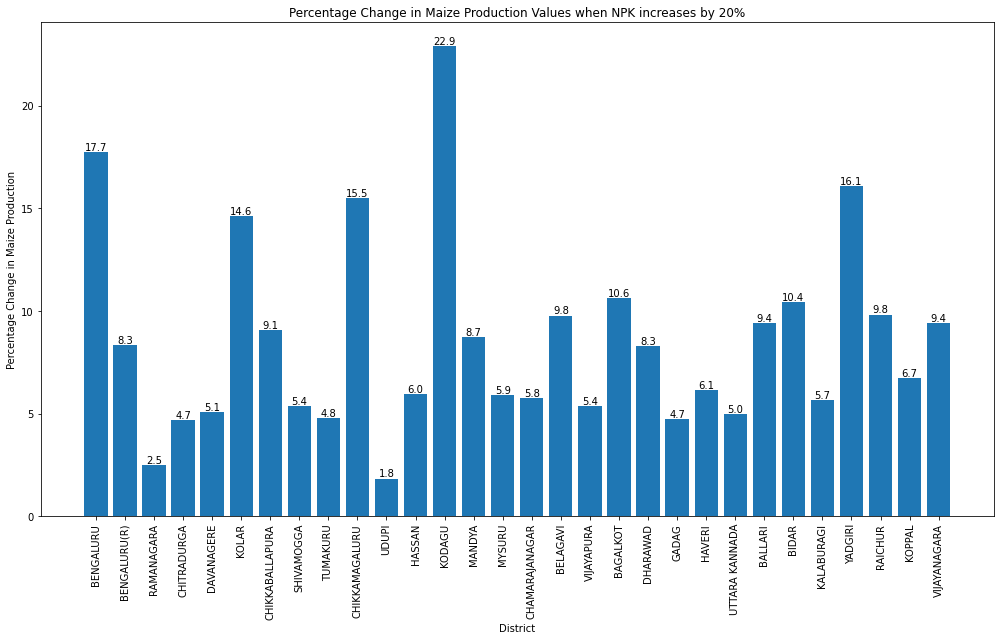

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize(perturbation, crop, Working_Directory, what,plot = True):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'Cattle': 'LivestockCensus_2012_Cattle',
        'MArea': 'AreaUnderCereals_Maize',
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope = get_slope(what,crop)
    print(slope)
    # Calculate the factor
    factor = Working_Directory[factor_name]
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + slope * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    Working_Directory['Change'] =  (New_values - Working_Directory[production_col])
    Working_Directory['Percentage Change'] =  ((New_values - Working_Directory[production_col])/Working_Directory[production_col])*100
    Working_Directory = Working_Directory.replace([np.inf, -np.inf], np.nan).dropna(subset=['Percentage Change'])
    
    # Visualization
    if(plot == True):
        plt.figure(figsize=(14, 9))
        bars = plt.bar(Working_Directory['District'], 
                    Working_Directory['Percentage Change'])
        
        # Add value labels to the bars
        for bar, value in zip(bars, Working_Directory['Percentage Change']):
            plt.text(bar.get_x() + bar.get_width() / 2, 
                    bar.get_height(), 
                    f'{value:.1f}', 
                    ha='center', 
                    va='bottom', 
                    fontsize=10)
        
        plt.xlabel('District')
        plt.ylabel(f'Percentage Change in {crop} Production')
        plt.title(f'Percentage Change in {crop} Production Values when {what} increases by {perturbation}%')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Example usage:
perturbation = 20
what = 'NPK'  # Factor to be used
crop = 'Maize'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize(perturbation, crop, Maize_Directory, what,plot = True)


In [15]:
Working_Directory

,District,Rice_Production,Maize_Production,Groundnut_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,AreaUnderCereals_Paddy,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderOilSeeds_GroundNut,MotorVehicles_Tractors,LivestockCensus_2012_Sheep,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Rice_Ratio,Maize_Ratio,Groundnut_Ratio,Admin_Zone,KDG_District,Abbreviation
0,BENGALURU,3376.0,2879,71.0,513.822990,4.450,2567.461578,1129.0,782.0,0.000000,72,14638,77302,9348,0.022043,0.018798,0.000464,Bengaluru Division,Bengaluru Urban,BLR
1,BENGALURU(R),2354.0,42583,206.0,167.835355,134.730,25037.139270,14867.0,736.0,0.000000,175,981,124870,20281,0.008715,0.157645,0.000763,Bengaluru Division,Bengaluru Rural,BLR(R)
2,RAMANAGARA,12128.0,10450,4830.0,257.908893,260.150,7729.614277,1987.0,4468.0,272.509463,3307,11407,152938,23868,0.034517,0.029741,0.013746,Bengaluru Division,Ramanagara,RGA
3,CHITRADURGA,4566.0,271975,68575.0,183.032957,5004.000,83821.593090,92194.0,1297.0,9.283245,96711,18587,940038,92506,0.005101,0.303824,0.076605,Bengaluru Division,Chitradurga,CDA
4,DAVANAGERE,489505.0,593544,16592.0,21197.529554,6124.600,85657.632090,173400.0,98259.0,18037.386429,15279,32337,343178,78364,0.212733,0.257947,0.007211,Bengaluru Division,Davanagere,DVG
5,KOLAR,864.0,1759,5810.0,108.445953,51.500,2278.829821,640.0,395.0,0.000000,8608,16855,445100,20140,0.004887,0.009950,0.032864,Bengaluru Division,Kolar,KLR
6,CHIKKABALLAPURA,2698.0,105491,7132.0,209.640893,3538.150,71206.945310,59377.0,1333.0,0.000000,19535,11411,432691,50370,0.007393,0.289061,0.019543,Bengaluru Division,Chikkaballapura,CKA
7,SHIVAMOGGA,384974.0,226532,248.0,17722.015760,3814.020,104722.000400,43827.0,109617.0,13305.677787,438,17941,36791,32347,0.313060,0.184215,0.000202,Bengaluru Division,Shivamogga,SMG
8,TUMAKURU,26042.0,66868,39626.0,1069.562417,1639.850,37944.093760,24207.0,10379.0,114.924409,64771,26534,1061330,144708,0.028037,0.071991,0.042662,Bengaluru Division,Tumakuru,TKR
9,CHIKKAMAGALURU,110533.0,61353,3909.0,14694.297645,2923.790,40572.445630,25831.0,33036.0,1344.644186,5851,15882,91312,26174,0.216529,0.120188,0.007658,Mysuru Division,Chikkamagaluru,CMG


In [16]:
Rice_Directory

,District,Rice_Production,TotalNPK,NetAreaIrrigated_Canals_NetAreaIrrigated,AreaUnderCereals_Paddy,Rice_Ratio,KDG_District,Abbreviation
0,BENGALURU,3376.0,513.822990,0.000000,782.0,0.022043,Bengaluru Urban,BLR
1,BENGALURU(R),2354.0,167.835355,0.000000,736.0,0.008715,Bengaluru Rural,BLR(R)
2,RAMANAGARA,12128.0,257.908893,272.509463,4468.0,0.034517,Ramanagara,RGA
3,CHITRADURGA,4566.0,183.032957,9.283245,1297.0,0.005101,Chitradurga,CDA
4,DAVANAGERE,489505.0,21197.529554,18037.386429,98259.0,0.212733,Davanagere,DVG
5,KOLAR,864.0,108.445953,0.000000,395.0,0.004887,Kolar,KLR
6,CHIKKABALLAPURA,2698.0,209.640893,0.000000,1333.0,0.007393,Chikkaballapura,CKA
7,SHIVAMOGGA,384974.0,17722.015760,13305.677787,109617.0,0.313060,Shivamogga,SMG
8,TUMAKURU,26042.0,1069.562417,114.924409,10379.0,0.028037,Tumakuru,TKR
9,CHIKKAMAGALURU,110533.0,14694.297645,1344.644186,33036.0,0.216529,Chikkamagaluru,CMG


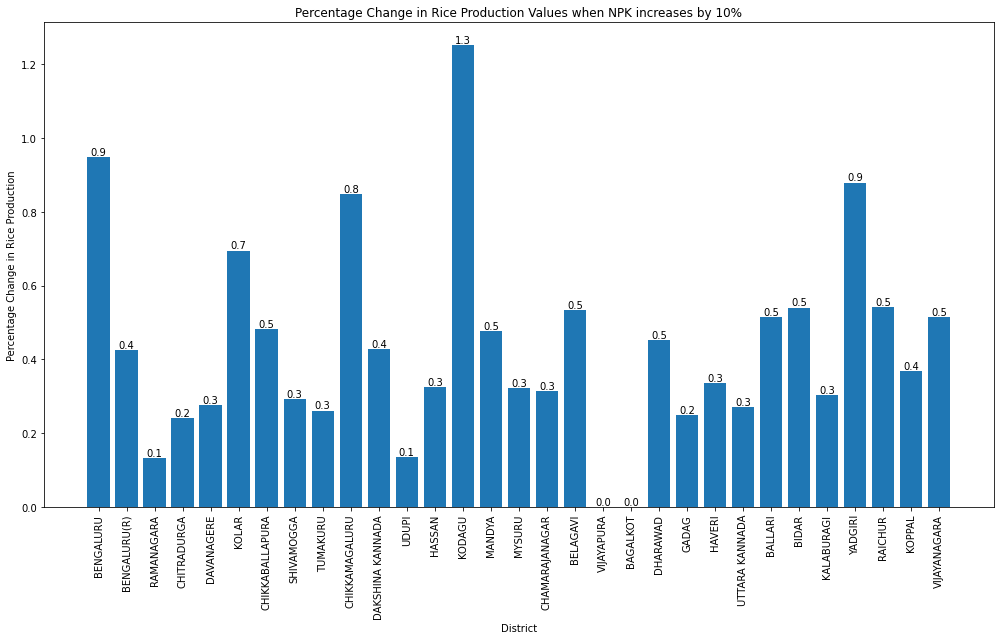

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize(perturbation, crop, Working_Directory, what,plot = True):
    # Mapping of factor names based on 'what'
    factor_mapping = {
        'NPK': 'TotalNPK',
        'PArea': 'AreaUnderCereals_Paddy',
        'Canal': 'NetAreaIrrigated_Canals_NetAreaIrrigated'
    }
    
    # Dynamically select the correct factor and slope column based on 'what'
    factor_name = factor_mapping[what]
    production_col = f'{crop}_Production'
    slope = get_slope(what,crop)

    # Calculate the factor
    factor = Working_Directory[factor_name]
    
    # Initialize an empty list for new values
    New_values = []
    
    # Calculate new values based on the provided formula
    for i in range(len(Working_Directory['District'])):
        y_new = Working_Directory[production_col][i] + slope * (perturbation * factor[i] / 100)
        New_values.append(int(y_new))
    
    # Add the new values to the DataFrame with a specific column name
    Working_Directory[f'{crop[0].upper()} - {what} {perturbation}'] = New_values
    Working_Directory['Change'] =  (New_values - Working_Directory[production_col])
    Working_Directory['Percentage Change'] =  ((New_values - Working_Directory[production_col])/Working_Directory[production_col])*100
    Working_Directory = Working_Directory.replace([np.inf, -np.inf], np.nan).dropna(subset=['Percentage Change'])
    
    # Visualization
    if(plot == True):
        plt.figure(figsize=(14, 9))
        bars = plt.bar(Working_Directory['District'], 
                    Working_Directory['Percentage Change'])
        
        # Add value labels to the bars
        for bar, value in zip(bars, Working_Directory['Percentage Change']):
            plt.text(bar.get_x() + bar.get_width() / 2, 
                    bar.get_height(), 
                    f'{value:.1f}', 
                    ha='center', 
                    va='bottom', 
                    fontsize=10)
        
        plt.xlabel('District')
        plt.ylabel(f'Percentage Change in {crop} Production')
        plt.title(f'Percentage Change in {crop} Production Values when {what} increases by {perturbation}%')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Example usage:
perturbation = 10
what = 'NPK'  # Factor to be used
crop = 'Rice'  # Or 'Maize'

# Assuming Working_Directory is a DataFrame that has all necessary columns defined
calculate_and_visualize(perturbation, crop, Rice_Directory, what,plot = True)


In [18]:
import pandas as pd
import numpy as np

adjacency_excel = pd.read_excel('Karnataka_District_Adjacency_File.xlsx')

district_codes = sorted(set(adjacency_excel['District_Code']))

n = len(district_codes)
adj_matrix = np.zeros((n, n), dtype=int)

code_to_index = {code: idx for idx, code in enumerate(district_codes)}

for i in range(len(adjacency_excel)):
    district_code = adjacency_excel['District_Code'][i]
    neighbors = [int(num) for num in str(adjacency_excel['District_Neighbors'][i]).split(',') if num.strip().isdigit()]
    
    for neighbor in neighbors:
        adj_matrix[code_to_index[district_code]][code_to_index[neighbor]] = 1
        adj_matrix[code_to_index[neighbor]][code_to_index[district_code]] = 1  # Assuming adjacency is bidirectional

adj_matrix_df = pd.DataFrame(adj_matrix, index=district_codes, columns=district_codes)

print(adj_matrix_df)

adj_matrix_np = adj_matrix_df.to_numpy()

    1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  27  28  \
1    0   1   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    1   0   1   0   0   1   1   0   1   0  ...   0   0   0   0   0   0   0   
3    1   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   1   0   0   0   1   1  ...   0   0   0   1   0   0   0   
5    0   0   0   1   0   0   0   1   0   1  ...   0   1   0   1   0   0   0   
6    0   1   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
7    0   1   0   0   0   1   0   0   1   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   1   0   0   0   0   1  ...   0   1   1   0   0   0   0   
9    0   1   1   1   0   0   1   0   0   1  ...   0   0   0   0   0   0   0   
10   0   0   0   1   1   0   0   1   1   0  ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   1   0   1  ...   0 

In [19]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized_lst = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized_lst

Name = 'M - NPK 20'
Capability_list = normalize_list(Maize_Directory[f'{Name}'])

Name = 'R - NPK 10'
Capability_list = normalize_list(Rice_Directory[f'{Name}'])
# Capability_list

In [20]:
import numpy as np

def calculate_avg_capability(capability, neighbors):
    num_neighbors = len(neighbors)
    if num_neighbors == 0:
        return 0
    sum_capabilities = sum(capability[n] for n in neighbors)
    return sum_capabilities / num_neighbors

def calculate_stress_stability(capability, adjacency_matrix):
    n = len(capability)
    stress = np.zeros(n)
    stability = np.zeros(n)
    
    for i in range(n):
        neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
        if len(neighbors) > 0:
            avg_capability = calculate_avg_capability(capability, neighbors)
            stress[i] = np.linalg.norm(avg_capability - capability[i])
            stability[i] = 1 - stress[i]
        else:
            stress[i] = 0  # If no neighbors, stress is zero
            stability[i] = 1
        
    return stress, stability

Name = 'R - NPK 10'

Capability_list = normalize_list(Rice_Directory[f'{Name}'])
stress, stability = calculate_stress_stability(Capability_list, adj_matrix_np)

print("Stress values:", stress)
print("Stability values:", stability)

Stress values: [0.00777084 0.01350623 0.1070376  0.41214199 0.64076352 0.00336918
 0.01428561 0.3679779  0.0988267  0.15674202 0.02589018 0.11656012
 0.03238558 0.2495661  0.26460023 0.45269757 0.32141508 0.28182944
 0.36663629 0.37376542 0.16590376 0.27316871 0.1746956  0.03877299
 0.03605351 0.01185023 0.13814428 0.11907817 0.72600404 0.12336365
 0.05486634]
Stability values: [0.99222916 0.98649377 0.8929624  0.58785801 0.35923648 0.99663082
 0.98571439 0.6320221  0.9011733  0.84325798 0.97410982 0.88343988
 0.96761442 0.7504339  0.73539977 0.54730243 0.67858492 0.71817056
 0.63336371 0.62623458 0.83409624 0.72683129 0.8253044  0.96122701
 0.96394649 0.98814977 0.86185572 0.88092183 0.27399596 0.87663635
 0.94513366]


In [21]:
# Combined calculation function
def calculate_metrics(Working_Directory, crop, perturbation, what):
    # Normalize the capability list
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    Capability_list = normalize_list(Working_Directory[capability_name])
    
    def calculate_avg_capability(capability, neighbors):
        num_neighbors = len(neighbors)
        if num_neighbors == 0:
            return 0
        return sum(capability[n] for n in neighbors) / num_neighbors

    # Calculate stress and stability
    stress, stability = calculate_stress_stability(Capability_list, adj_matrix_np)
    
    # Calculate the impact as percentage change
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = ((new_production - original_production) / original_production) * 100

    # Column names
    stability_column_name = f'Stability_{crop[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop[0].upper()}_{what}_{perturbation}'
    impact_column_name = f'Impact_{crop[0].upper()}_{what}_{perturbation}'

    return stability, stress, impact, stability_column_name, stress_column_name, impact_column_name

In [22]:
# Impact calculation function
def calculate_impact(Working_Directory, crop, perturbation, what):
    # Normalize the capability list
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'

    # Calculate the impact as percentage change
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = ((new_production - original_production) / original_production) * 100

    # Column names
    impact_column_name = f'Impact_{crop[0].upper()}_{what}_{perturbation}'

    return impact, impact_column_name


In [23]:
# Combined calculation function
def calculate_Change_Impact(Working_Directory, crop, perturbation, what):
    # Normalize the capability list
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    
    # Calculate the impact as percentage change
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    change = (new_production - original_production) 
    impact = ((new_production - original_production) / original_production) * 100

    return change,impact,new_production

In [24]:
import plotly.express as px
import numpy as np
import pandas as pd

# Function to calculate stress and stability for a combined capability of two crops
def calculate_stress_stability(adj_matrix, df):
    df['stress'] = 0.0
    df['stability'] = 0.0
    capability_columns = df.columns.difference(['node', 'stress', 'stability'])
    
    for idx, row in df.iterrows():
        node = row['node']
        node_idx = df.index[df['node'] == node][0]
        neighbors_idx = np.where(adj_matrix[node_idx] == 1)[0]
        
        if len(neighbors_idx) > 0:
            neighbor_capabilities = df.iloc[neighbors_idx][capability_columns].values
            centroid = np.mean(neighbor_capabilities, axis=0)
            node_capabilities = row[capability_columns].values
            stress = np.linalg.norm(node_capabilities - centroid)
            stability = 1 - stress
        else:
            stress = 0
            stability = 1
        
        df.at[idx, 'stress'] = stress
        df.at[idx, 'stability'] = stability
    
    return df

# Function to calculate impact for a specific crop
def calculate_impact( crop, perturbation, what):
    if(crop == 'Maize'):
        Working_Directory = Maize_Directory
    elif(crop == 'Rice'):
        Working_Directory = Rice_Directory
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = ((new_production - original_production) / original_production) * 100
    impact_column_name = f'Impact_{crop[0].upper()}_{what}_{perturbation}'
    return impact, impact_column_name

# Function to calculate and visualize stability vs impact for two crops
def Calculate_and_visualize_2D(Rice_Directory,Maize_Directory, adj_matrix_np, crop1, crop2, perturbation, what,visualize = True):
    # Normalize capabilities for both crops
    calculate_and_visualize(perturbation, crop1, Rice_Directory, what,False)
    calculate_and_visualize(perturbation, crop2, Maize_Directory, what,False)
    capability_1 = normalize_list(Rice_Directory[f'{crop1[0].upper()} - {what} {perturbation}'])
    capability_2 = normalize_list(Maize_Directory[f'{crop2[0].upper()} - {what} {perturbation}'])
    
    # Combine capabilities into a single DataFrame
    combined_df = pd.DataFrame({
        'node': Working_Directory['District'],
        'Capability_1': capability_1,
        'Capability_2': capability_2
    })
    
    # Calculate stress and stability for the combined capabilities
    result_df = calculate_stress_stability(adj_matrix_np, combined_df)
    
    # Calculate impact for each crop
    impact1, impact_column1 = calculate_impact(crop1, perturbation, what)
    impact2, impact_column2 = calculate_impact(crop2, perturbation, what)
    
    # Naming conventions for stability and stress columns
    stability_column_name = f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    
    # Add impacts, stability, and stress to the Working_Directory DataFrame
    Working_Directory[impact_column1] = impact1
    Working_Directory[impact_column2] = impact2
    Working_Directory[stability_column_name] = result_df['stability']
    Working_Directory[stress_column_name] = result_df['stress']
    
    if visualize:
        # Prepare data for plotting
        plot_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'Stability': result_df['stability'],
            f'{crop1}': impact1,
            f'{crop2}': impact2,
            'Abbreviation': Working_Directory['Abbreviation']
        })
        
        # Calculate average values
        avg_stability = result_df['stability'].mean()
        avg_impact = pd.concat([impact1, impact2]).mean()  # Combine impacts and calculate average
        
        # Calculate min and max values for impact columns
        min_impact = plot_df[[f'{crop1}', f'{crop2}']].min().min()
        max_impact = plot_df[[f'{crop1}', f'{crop2}']].max().max()
        
        # Plot using Plotly Express
        fig = px.scatter(
            plot_df,
            x='Stability',
            y=[f'{crop1}', f'{crop2}'],  # Plot both impacts
            title=f'Impact vs Stability for {crop1} and {crop2} ({what} +{perturbation}%)',
            labels={'Stability': 'Stability', 'Impact': 'Impact'},
            # text='Abbreviation',
            width=900,
            height=600
        )
        
        # Add average lines
        fig.add_shape(
            type='line',
            x0=min(result_df['stability']),
            x1=max(result_df['stability']),
            y0=avg_impact,
            y1=avg_impact,
            line=dict(color='red', width=2, dash='dash')
        )
        fig.add_shape(
            type='line',
            x0=avg_stability,
            x1=avg_stability,
            y0=min_impact,
            y1=max_impact,
            line=dict(color='blue', width=2, dash='dash')
        )
        
        fig.add_annotation(
            x=avg_stability,
            y=max_impact,
            text=f'Avg Stability: {avg_stability:.2f}',
            showarrow=False,
            font=dict(color='blue')
        )
        fig.add_annotation(
            x=max(result_df['stability']),
            y=avg_impact,
            text=f'Avg Impact: {avg_impact:.2f}%',
            showarrow=False,
            font=dict(color='red')
        )
        
        # Update y-axis title and legend title
        fig.update_layout(
            yaxis_title='Impact',
            legend_title='Legend'
        )
        
        # Update hover labels to only show text for one crop
        fig.update_traces(
            hoverlabel=dict(bgcolor='grey', font=dict(color='white')),
            textposition='top center',
            selector=dict(mode='markers+text')
        )
        
        # Show the plot
        fig.show()

# Example usage
crop1 = 'Rice'
crop2 = 'Maize'
perturbation = 20
what = 'NPK'
Calculate_and_visualize_2D(Rice_Directory,Maize_Directory, adj_matrix_np, crop1, crop2, perturbation, what)


In [25]:
def calculate_change_impact(crop, perturbation, what):
    capability_name = f'{crop[0].upper()} - {what} {perturbation}'
    if(crop == "Maize"): 
        Working_Directory = Maize_Directory
    elif(crop == "Rice"):
        Working_Directory = Rice_Directory
    original_production = Working_Directory[f'{crop}_Production']
    new_production = Working_Directory[capability_name]
    impact = (new_production - original_production)/(original_production)
    impact_column_name = f'Change_{crop[0].upper()}_{what}_{perturbation}'
    return impact, impact_column_name

def Calculate_SI_Score(Rice_Directory,Maize_Directory, adj_matrix_np, crop1, crop2, perturbation, what,visualize = True):
    # Normalize capabilities for both crops
    capability_1 = normalize_list(Rice_Directory[f'{crop1[0].upper()} - {what} {perturbation}'])
    capability_2 = normalize_list(Maize_Directory[f'{crop2[0].upper()} - {what} {perturbation}'])
    
    # Combine capabilities into a single DataFrame
    combined_df = pd.DataFrame({
        'node': Working_Directory['District'],
        'Capability_1': capability_1,
        'Capability_2': capability_2
    })
    
    # Calculate stress and stability for the combined capabilities
    result_df = calculate_stress_stability(adj_matrix_np, combined_df)

    # Calculate impact for each crop
    impact1, impact_column1 = calculate_change_impact( crop1, perturbation, what)
    impact2, impact_column2 = calculate_change_impact( crop2, perturbation, what)
    
    # Naming conventions for stability and stress columns
    stability_column_name = f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    stress_column_name = f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{what}_{perturbation}'
    
    # Add impacts, stability, and stress to the result_df DataFrame
    result_df[impact_column1] = impact1
    result_df[impact_column2] = impact2
    result_df['Mean_Impact'] = (impact1 + impact2)/2
    result_df['Dissonance'] = (impact1 - impact2).abs()
    result_df[stability_column_name] = result_df['stability']
    
    result_df['SI_Score'] = result_df['stability']*result_df[impact_column1]*(1 - (result_df[impact_column2].mean()))
    
    return result_df

result_df = pd.DataFrame()
crop1 = 'Rice'
crop2 = 'Maize'
perturbation = 20
what = 'NPK'
result_df = Calculate_SI_Score(Rice_Directory,Maize_Directory, adj_matrix_np, crop1, crop2, perturbation, what)

In [26]:
result_df.to_csv('2D/Maize_Rice SI Score NPK+20%.csv',index=False)
result_df

,node,Capability_1,Capability_2,stress,stability,Change_R_NPK_20,Change_M_NPK_20,Mean_Impact,Dissonance,Stability_R_M_NPK_20,SI_Score
0,BENGALURU,0.006744,0.005355,0.040272,0.959728,0.019254,0.177492,0.098373,0.158239,0.959728,0.016900
1,BENGALURU(R),0.004602,0.072856,0.016356,0.983644,0.008921,0.083202,0.046062,0.074281,0.983644,0.008026
2,RAMANAGARA,0.024267,0.016915,0.131787,0.868213,0.002639,0.024785,0.013712,0.022146,0.868213,0.002095
3,CHITRADURGA,0.009051,0.449681,0.433664,0.566336,0.005037,0.046776,0.025907,0.041739,0.566336,0.002609
4,DAVANAGERE,0.988993,0.984883,0.913259,0.086741,0.005518,0.050534,0.028026,0.045016,0.086741,0.000438
5,KOLAR,0.001592,0.003184,0.124155,0.875845,0.015046,0.146106,0.080576,0.131059,0.875845,0.012053
6,CHIKKABALLAPURA,0.005303,0.181732,0.120337,0.879663,0.009637,0.090671,0.050154,0.081034,0.879663,0.007753
7,SHIVAMOGGA,0.778032,0.377030,0.367107,0.632893,0.005865,0.053719,0.029792,0.047853,0.632893,0.003395
8,TUMAKURU,0.052438,0.110679,0.135722,0.864278,0.005222,0.047915,0.026569,0.042693,0.864278,0.004128
9,CHIKKAMAGALURU,0.225724,0.111941,0.287887,0.712113,0.016936,0.155135,0.086036,0.138199,0.712113,0.011030


In [27]:
ranked_df = result_df[['node', 'SI_Score']].sort_values(by='SI_Score', ascending=True)
ranked_df = ranked_df.dropna()

ranked_df['SI_Score'] = ranked_df['SI_Score'].round(5)

fig = px.bar(
    ranked_df,
    x='SI_Score',        
    y='node',            
    text='SI_Score',     
    title='Ranked Bar Chart of SI Score by District for NPK +20%',
    labels={'node': 'District', 'SI_Score': 'SI Score'},
    color='SI_Score',    
    color_continuous_scale='Temps_r'
)

fig.update_layout(
    width=700,
    height=800,
    xaxis_title='SI Score',
    yaxis_title='District',
    title_x=0.5 
)

fig.show()


In [28]:
Rice_Prod = normalize_list(Rice_Directory['Rice_Production'])
Maize_Prod = normalize_list(Maize_Directory['Maize_Production'])

# Combine capabilities into a single DataFrame
combined_df = pd.DataFrame({
    'node': Working_Directory['District'],
    'Rice_Production': Rice_Prod,
    'Maize_Production': Maize_Prod
})

# Calculate stress and stability for the combined capabilities
init_df = calculate_stress_stability(adj_matrix_np, combined_df)
init_df[:5]

,node,Rice_Production,Maize_Production,stress,stability
0,BENGALURU,0.006686,0.004851,0.040591,0.959409
1,BENGALURU(R),0.004609,0.071744,0.016035,0.983965
2,RAMANAGARA,0.024465,0.017606,0.131655,0.868345
3,CHITRADURGA,0.009103,0.458222,0.437286,0.562714
4,DAVANAGERE,0.994237,1.000000,0.927410,0.072590


In [29]:
# Perturbations and factor mapping
crop1 = 'Rice'
crop2 = 'Maize'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK'
}

# Initialize an empty DataFrame to store the results
R_M_2D_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function to calculate and 
        calculate_and_visualize(perturbation, crop1, Rice_Directory, factor,False)
        calculate_and_visualize(perturbation, crop2, Maize_Directory, factor, False)
        Calculate_and_visualize_2D(Rice_Directory,Maize_Directory, adj_matrix_np, crop1, crop2, perturbation, factor,False)
        
        # Collect all the new columns in a dictionary
        new_columns = {
            'District': Working_Directory['District'],
            'KDG_District' : Working_Directory['KDG_District'],
            'Original Rice Production': Rice_Directory[f'{crop1}_Production'],
            'Original Maize Production': Maize_Directory[f'{crop2}_Production'],
            'Initial Stress': init_df['stress'],
            'Initial Stability': init_df['stability'],
            'New Rice Production': Rice_Directory[f'{crop1[0].upper()} - {factor} {perturbation}'],
            'New Maize Production': Maize_Directory[f'{crop2[0].upper()} - {factor} {perturbation}'],
            'Rice Impact': Working_Directory[f'Impact_{crop1[0].upper()}_{factor}_{perturbation}'],
            'Maize Impact': Working_Directory[f'Impact_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stability': Working_Directory[f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stress': Working_Directory[f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Perturbation': perturbation,
            'Factor': mapped_factor,
        }
        
        # Convert the dictionary to a DataFrame and append it to the final DataFrame
        temp_df = pd.DataFrame(new_columns)
        R_M_2D_Diff_Impact = pd.concat([R_M_2D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
R_M_2D_Diff_Impact.to_csv('2D\R_M_2D_Diff_Impact.csv', index=False)
R_M_2D_Diff_Impact


,District,KDG_District,Original Rice Production,Original Maize Production,Initial Stress,Initial Stability,New Rice Production,New Maize Production,Rice Impact,Maize Impact,Stability,Stress,Perturbation,Factor
0,BENGALURU,Bengaluru Urban,3376.0,2879,0.040591,0.959409,3408,3134,0.947867,8.857242,0.959267,0.040733,10,TotalNPK
1,BENGALURU(R),Bengaluru Rural,2354.0,42583,0.016035,0.983965,2364,44354,0.424809,4.158937,0.983762,0.016238,10,TotalNPK
2,RAMANAGARA,Ramanagara,12128.0,10450,0.131655,0.868345,12144,10579,0.131926,1.234450,0.867924,0.132076,10,TotalNPK
3,CHITRADURGA,Chitradurga,4566.0,271975,0.437286,0.562714,4577,278336,0.240911,2.338818,0.564231,0.435769,10,TotalNPK
4,DAVANAGERE,Davanagere,489505.0,593544,0.927410,0.072590,490855,608541,0.275789,2.526687,0.076124,0.923876,10,TotalNPK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,KALABURAGI,Kalaburagi,7888.0,14621,0.173413,0.826587,7839,13792,-0.621197,-5.669927,0.827792,0.172208,-20,TotalNPK
120,YADGIRI,Yadgir,224659.0,2673,0.176163,0.823837,220710,2242,-1.757775,-16.124205,0.825891,0.174109,-20,TotalNPK
121,RAICHUR,Raichur,492342.0,723,0.771235,0.228765,487000,651,-1.085018,-9.958506,0.231226,0.768774,-20,TotalNPK
122,KOPPAL,Koppal,243505.0,190252,0.171777,0.828223,241711,177418,-0.736741,-6.745790,0.825420,0.174580,-20,TotalNPK


In [30]:
# Perturbations and factor mapping
crop1 = 'Rice'
crop2 = 'Maize'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK'
}

# Initialize an empty DataFrame to store the results
R_M_2D_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function to calculate and visualize for both crops
        calculate_and_visualize(perturbation, crop1, Rice_Directory, factor, False)
        calculate_and_visualize(perturbation, crop2, Maize_Directory, factor, False)
        Calculate_and_visualize_2D(Rice_Directory, Maize_Directory, adj_matrix_np, crop1, crop2, perturbation, factor, False)

        # Create a DataFrame for Rice entries
        rice_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'KDG_District': Working_Directory['KDG_District'],
            'Crop': crop1,  # Indicate that these entries are for Rice
            'Original Production': Rice_Directory[f'{crop1}_Production'],
            'New Production': Rice_Directory[f'{crop1[0].upper()} - {factor} {perturbation}'],
            'Impact': Working_Directory[f'Impact_{crop1[0].upper()}_{factor}_{perturbation}'],
            'Stability': Working_Directory[f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stress': Working_Directory[f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Perturbation': perturbation,
            'Factor': mapped_factor
        })

        # Create a DataFrame for Maize entries
        maize_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'KDG_District': Working_Directory['KDG_District'],
            'Crop': crop2,  # Indicate that these entries are for Maize
            'Original Production': Maize_Directory[f'{crop2}_Production'],
            'New Production': Maize_Directory[f'{crop2[0].upper()} - {factor} {perturbation}'],
            'Impact': Working_Directory[f'Impact_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stability': Working_Directory[f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stress': Working_Directory[f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Perturbation': perturbation,
            'Factor': mapped_factor
        })

        # Concatenate the Rice and Maize DataFrames for the current perturbation and factor
        temp_df = pd.concat([rice_df, maize_df], ignore_index=True)
        
        # Append to the final DataFrame
        R_M_2D_Diff_Impact = pd.concat([R_M_2D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
R_M_2D_Diff_Impact.to_csv('2D/R_M_2D_Diff_Impact_1.csv', index=False)
R_M_2D_Diff_Impact


,District,KDG_District,Crop,Original Production,New Production,Impact,Stability,Stress,Perturbation,Factor
0,BENGALURU,Bengaluru Urban,Rice,3376.0,3408,0.947867,0.959267,0.040733,10,TotalNPK
1,BENGALURU(R),Bengaluru Rural,Rice,2354.0,2364,0.424809,0.983762,0.016238,10,TotalNPK
2,RAMANAGARA,Ramanagara,Rice,12128.0,12144,0.131926,0.867924,0.132076,10,TotalNPK
3,CHITRADURGA,Chitradurga,Rice,4566.0,4577,0.240911,0.564231,0.435769,10,TotalNPK
4,DAVANAGERE,Davanagere,Rice,489505.0,490855,0.275789,0.076124,0.923876,10,TotalNPK
...,...,...,...,...,...,...,...,...,...,...
243,KALABURAGI,Kalaburagi,Maize,14621.0,13792,-5.669927,0.827792,0.172208,-20,TotalNPK
244,YADGIRI,Yadgir,Maize,2673.0,2242,-16.124205,0.825891,0.174109,-20,TotalNPK
245,RAICHUR,Raichur,Maize,723.0,651,-9.958506,0.231226,0.768774,-20,TotalNPK
246,KOPPAL,Koppal,Maize,190252.0,177418,-6.745790,0.825420,0.174580,-20,TotalNPK


In [31]:
# Perturbations and factor mapping
crop1 = 'Rice'
crop2 = 'Maize'
perturbations = [10, -10, 20, -20]
factor_mapping = {
    'NPK': 'TotalNPK'
}

# Initialize an empty DataFrame to store the results
R_M_2D_Diff_Impact = pd.DataFrame()

# Loop over each perturbation and factor
for perturbation in perturbations:
    for factor, mapped_factor in factor_mapping.items():
        # Call the function to calculate and visualize for both crops
        calculate_and_visualize(perturbation, crop1, Rice_Directory, factor, False)
        calculate_and_visualize(perturbation, crop2, Maize_Directory, factor, False)
        Calculate_and_visualize_2D(Rice_Directory, Maize_Directory, adj_matrix_np, crop1, crop2, perturbation, factor, False)
        result_df = Calculate_SI_Score(Rice_Directory,Maize_Directory, adj_matrix_np, crop1, crop2, perturbation, what)
        
        # Create a DataFrame for Rice entries
        rice_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'KDG_District': Working_Directory['KDG_District'],
            'Crop': crop1,  # Indicate that these entries are for Rice
            'Original Production': Rice_Directory[f'{crop1}_Production'],
            'New Production': Rice_Directory[f'{crop1[0].upper()} - {factor} {perturbation}'],
            'Impact': Working_Directory[f'Impact_{crop1[0].upper()}_{factor}_{perturbation}'],
            'Stability': Working_Directory[f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stress': Working_Directory[f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'SI Score' : result_df['SI_Score'],
            'Perturbation': perturbation,
            'Factor': mapped_factor
        })

        # Create a DataFrame for Maize entries
        maize_df = pd.DataFrame({
            'District': Working_Directory['District'],
            'KDG_District': Working_Directory['KDG_District'],
            'Crop': crop2,  # Indicate that these entries are for Maize
            'Original Production': Maize_Directory[f'{crop2}_Production'],
            'New Production': Maize_Directory[f'{crop2[0].upper()} - {factor} {perturbation}'],
            'Impact': Working_Directory[f'Impact_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stability': Working_Directory[f'Stability_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'Stress': Working_Directory[f'Stress_{crop1[0].upper()}_{crop2[0].upper()}_{factor}_{perturbation}'],
            'SI Score' : result_df['SI_Score'],
            'Perturbation': perturbation,
            'Factor': mapped_factor
        })

        # Concatenate the Rice and Maize DataFrames for the current perturbation and factor
        temp_df = pd.concat([rice_df, maize_df], ignore_index=True)
        
        # Append to the final DataFrame
        R_M_2D_Diff_Impact = pd.concat([R_M_2D_Diff_Impact, temp_df], ignore_index=True)

# Display or save the final DataFrame
R_M_2D_Diff_Impact.to_csv('2D/R_M_2D_Diff_Impact_SI.csv', index=False)
R_M_2D_Diff_Impact


,District,KDG_District,Crop,Original Production,New Production,Impact,Stability,Stress,SI Score,Perturbation,Factor
0,BENGALURU,Bengaluru Urban,Rice,3376.0,3408,0.947867,0.959267,0.040733,0.008705,10,TotalNPK
1,BENGALURU(R),Bengaluru Rural,Rice,2354.0,2364,0.424809,0.983762,0.016238,0.004001,10,TotalNPK
2,RAMANAGARA,Ramanagara,Rice,12128.0,12144,0.131926,0.867924,0.132076,0.001096,10,TotalNPK
3,CHITRADURGA,Chitradurga,Rice,4566.0,4577,0.240911,0.564231,0.435769,0.001301,10,TotalNPK
4,DAVANAGERE,Davanagere,Rice,489505.0,490855,0.275789,0.076124,0.923876,0.000201,10,TotalNPK
...,...,...,...,...,...,...,...,...,...,...,...
243,KALABURAGI,Kalaburagi,Maize,14621.0,13792,-5.669927,0.827792,0.172208,-0.005584,-20,TotalNPK
244,YADGIRI,Yadgir,Maize,2673.0,2242,-16.124205,0.825891,0.174109,-0.015763,-20,TotalNPK
245,RAICHUR,Raichur,Maize,723.0,651,-9.958506,0.231226,0.768774,-0.002724,-20,TotalNPK
246,KOPPAL,Koppal,Maize,190252.0,177418,-6.745790,0.825420,0.174580,-0.006603,-20,TotalNPK
